In [19]:
#initialization
import pyspiel
import numpy as np
import matplotlib.pyplot as plt
import random
from open_spiel.python.egt import dynamics
from open_spiel.python.egt.utils import game_payoffs_array
from mpltern.datasets import get_triangular_grid


# Define games
biased_rock_paper_scissors = pyspiel.create_matrix_game("brps", "biased_rock_paper_scissors", ["R", "P", "S"], ["R", "P", "S"], [[0, -0.25, 0.5], [0.25, 0, -0.05], [-0.5, 0.05, 0]], [[0, 0.25, -0.5], [-0.25, 0, 0.05], [0.5, -0.05, 0]])
dispersion = pyspiel.create_matrix_game("d", "dispersion", ["A", "B"], ["A", "B"], [[-1, 1], [1, -1]], [[-1, 1], [1, -1]])
battle_of_the_sexes = pyspiel.create_matrix_game("bots", "battle_of_the_sexes", ["O", "M"], ["O", "M"], [[3, 0], [0, 2]], [[2, 0], [0, 3]])
prisoner_dilemma = pyspiel.create_matrix_game("pd", "prisoner_dilemma", ["C", "D"], ["C", "D"], [[-1, -4], [0, -3]], [[-1, 0], [-4, -3]])

# ε-greedy
# Define Action class
class Actions:
    def __init__(self, action):
        self.action = action
        self.mean = 0
        self.N = 0

    # Update the action-value estimate
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x



# Perform ε-greedy
def epsilon(game, eps1, eps2, itt):
    # Get actions
    state = game.new_initial_state()
    temp_actions_player_1 = state.legal_actions(0)
    temp_actions_player_2 = state.legal_actions(1)
    actions_player_1 = []
    actions_player_2 = []

    for action in temp_actions_player_1:
        actions_player_1 += [Actions(action)]
    for action in temp_actions_player_2:
        actions_player_2 += [Actions(action)]
    data1 = np.empty(itt)
    data2 = np.empty(itt)
    data3= np.empty(itt)
    data4 = np.empty(itt)
    start1 = True
    start2 = True
    for i in range(itt):
        number1 = np.random.random()
        number2 = np.random.random()
        if number1 < eps1 or start1:
            action1 = random.choice(actions_player_1)
        else:
            action1 = actions_player_1[np.argmax([act.mean for act in actions_player_1])]
        if number2 < eps2 or start2:
            action2 = random.choice(actions_player_2)
        else:
            action2 = actions_player_2[np.argmax([act.mean for act in actions_player_2])]
        data3[i]=actions_player_1[0].N
        data4[i]=actions_player_2[0].N
        start1 = False
        start2 = False

        state = game.new_initial_state()
        state.apply_actions([action1.action, action2.action])
        results = state.returns()
        action1.update(results[0])
        action2.update(results[1])

        # for the plot
        data1[i] = results[0]
        data2[i] = results[1]
    cumulative_average1 = np.cumsum(data1) / (np.arange(itt) + 1)
    cumulative_average2 = np.cumsum(data2) / (np.arange(itt) + 1)
    cumulative_average3 = data3 / (np.arange(itt)+1)
    cumulative_average4 = data4 / (np.arange(itt)+1)

    

    return [cumulative_average3, cumulative_average4]





bots()


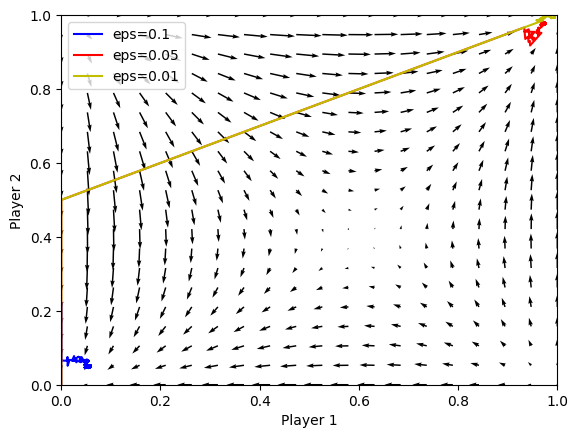

In [20]:
#battle of the sexes
game = battle_of_the_sexes
print(game)
payoff_matrix = game_payoffs_array(game)
dyn = dynamics.MultiPopulationDynamics(payoff_matrix, dynamics.replicator)

#train learners
c_1 = epsilon(game, 0.1, 0.1, 100000)
c_05 = epsilon(game, 0.05, 0.05, 100000)
c_01 = epsilon(game, 0.01, 0.01, 100000)


x_vals = np.linspace(0, 1, 20)
y_vals = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x_vals, y_vals)
# Computing dynamics/vector field
U = np.zeros_like(X)
V = np.zeros_like(Y)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        x = np.array([X[i,j],1-X[i,j],Y[i,j],1-Y[i,j]])
        x_dot = dyn(x)
        U[i,j] = x_dot[0]
        V[i,j] = x_dot[2]

# Plot the vector field
fig, ax = plt.subplots()
ax.quiver(X,Y,U,V)
ax.plot(c_1[0],c_1[1],'b',label="eps=0.1")
# ax.plot(c_1[0][0],c_1[1][0],'bo',markersize=20)
# ax.plot(c_1[0][len(c_1[0])-1],c_1[1][len(c_1[1])-1],'bx',markersize=12)
ax.plot(c_05[0],c_05[1],'r',label="eps=0.05")
ax.plot(c_01[0],c_01[1],'y',label="eps=0.01")
ax.set_xlabel("Player 1")
ax.set_ylabel("Player 2")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.legend()
plt.show()

d()


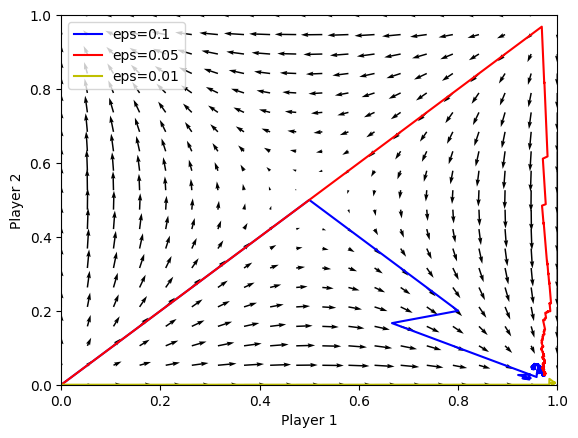

In [22]:
#dispersion
game = dispersion
print(game)
payoff_matrix = game_payoffs_array(game)
dyn = dynamics.MultiPopulationDynamics(payoff_matrix, dynamics.replicator)

#train learners
c_1 = epsilon(game, 0.1, 0.1, 100000)
c_05 = epsilon(game, 0.05, 0.05, 100000)
c_01 = epsilon(game, 0.01, 0.01, 100000)

x_vals = np.linspace(0, 1, 20)
y_vals = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x_vals, y_vals)
# Computing dynamics/vector field
U = np.zeros_like(X)
V = np.zeros_like(Y)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        x = np.array([X[i,j],1-X[i,j],Y[i,j],1-Y[i,j]])
        x_dot = dyn(x)
        U[i,j] = x_dot[0]
        V[i,j] = x_dot[2]

# Plot the vector field
fig, ax = plt.subplots()
ax.quiver(X,Y,U,V)
ax.plot(c_1[0],c_1[1],'b',label="eps=0.1")
# ax.plot(c_1[0][0],c_1[1][0],'bo',markersize=20)
# ax.plot(c_1[0][len(c_1[0])-1],c_1[1][len(c_1[1])-1],'bx',markersize=12)
ax.plot(c_05[0],c_05[1],'r',label="eps=0.05")
ax.plot(c_01[0],c_01[1],'y',label="eps=0.01")
ax.set_xlabel("Player 1")
ax.set_ylabel("Player 2")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.legend()
plt.show()

pd()


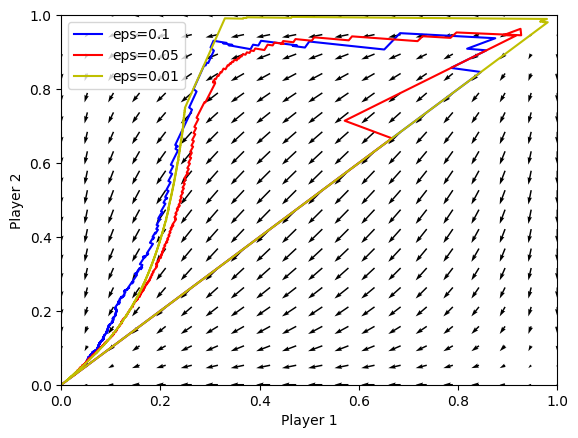

In [21]:
#prisoner dilemma
game = prisoner_dilemma
print(game)
payoff_matrix = game_payoffs_array(game)
dyn = dynamics.MultiPopulationDynamics(payoff_matrix, dynamics.replicator)

#train learners
c_1 = epsilon(game, 0.1, 0.1, 100000)
c_05 = epsilon(game, 0.05, 0.05, 100000)
c_01 = epsilon(game, 0.01, 0.01, 100000)

x_vals = np.linspace(0, 1, 20)
y_vals = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x_vals, y_vals)
# Computing dynamics/vector field
U = np.zeros_like(X)
V = np.zeros_like(Y)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        x = np.array([X[i,j],1-X[i,j],Y[i,j],1-Y[i,j]])
        x_dot = dyn(x)
        U[i,j] = x_dot[0]
        V[i,j] = x_dot[2]

# Plot the vector field
fig, ax = plt.subplots()
ax.quiver(X,Y,U,V)
ax.plot(c_1[0],c_1[1],'b',label="eps=0.1")
# ax.plot(c_1[0][0],c_1[1][0],'bo',markersize=20)
# ax.plot(c_1[0][len(c_1[0])-1],c_1[1][len(c_1[1])-1],'bx',markersize=12)
ax.plot(c_05[0],c_05[1],'r',label="eps=0.05")
ax.plot(c_01[0],c_01[1],'y',label="eps=0.01")
ax.set_xlabel("Player 1")
ax.set_ylabel("Player 2")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.legend()
plt.show()

brps()


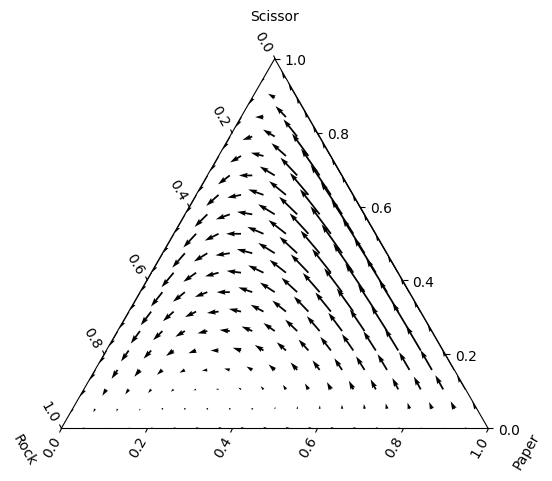

In [40]:
#biased rock paper scissor
# !!!need to install mpltern for plot!!!
game = biased_rock_paper_scissors
print(game)
payoff_matrix = game_payoffs_array(game)
dyn = dynamics.SinglePopulationDynamics(payoff_matrix, dynamics.replicator)

#train learners
c_1 = epsilon(game, 0.1, 0.1, 100000)
c_05 = epsilon(game, 0.05, 0.05, 100000)
c_01 = epsilon(game, 0.01, 0.01, 100000)

X, Y, Z = get_triangular_grid(20)
# Computing dynamics/vector field
U = np.zeros_like(X)
V = np.zeros_like(Y)
W = np.zeros_like(Z)
for i in range(len(U)):
    x = np.array([X[i],Y[i],Z[i]])
    x_dot = dyn(x)
    U[i] = x_dot[0]
    V[i] = x_dot[1]
    W[i] = x_dot[2]
length = np.sqrt(U ** 2 + V ** 2 + W ** 2)
ax = plt.subplot(projection='ternary')
ax.set_tlabel('Scissor')
ax.set_llabel('Rock')
ax.set_rlabel('Paper')
ax.quiver(X,Y,Z,U,V,W)
plt.show()




